# Heart disease prediction using different machine learning techniques

# Abstract 
Heart disease is considered as the most common disease among people, this project aims to find the most reasons for it by using different data visualizations, in addition to building different models to predict whether the person has a heart disease/heart attack, or not, the models will be build using a different classifications algorithm.

# Design 
The data has been got from Kaggle, with different data explorer and machine learning algorithms, the following questions will be answered hopefully:

    What are the most features effects in heart diseases?
    How is the model trusted?
    Which gender is likely to have a high chance of heart disease?
    Does diabetes have a relationship with heart diseases?

# Data 
The dataset contains 253680 instances with 22 features with the target, the dataset suffers from imbalanced data.
Link: Heart Disease Health Indicators Dataset | Kaggle

# Algorithms 
Feature engineering:
Solve data imbalance.
Handling missing data if any.
Feature selection:
Select the most relevant features to build a model.
modelling:
Build a model to predict whether the person has heart disease or not.




# Tools:
•	Seaborn
•	Pandas
•	NumPy
•	Skit-learn 
•	matplotlib


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Reading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\bno00\Downloads\heart_disease.csv")

***Data exploration and visualization***

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

***in terms of memory usage, I will change all data types from float to int since it doesn't needed .***

In [6]:
##retrieving columns name as list
listdf=list(df)
listdf

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [7]:
#converting them to int type
df[listdf] = df[listdf].applymap(np.int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [9]:
#checking null values if any 
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

*Creating heatmap to know most relevant feature to the target.*

<AxesSubplot:>

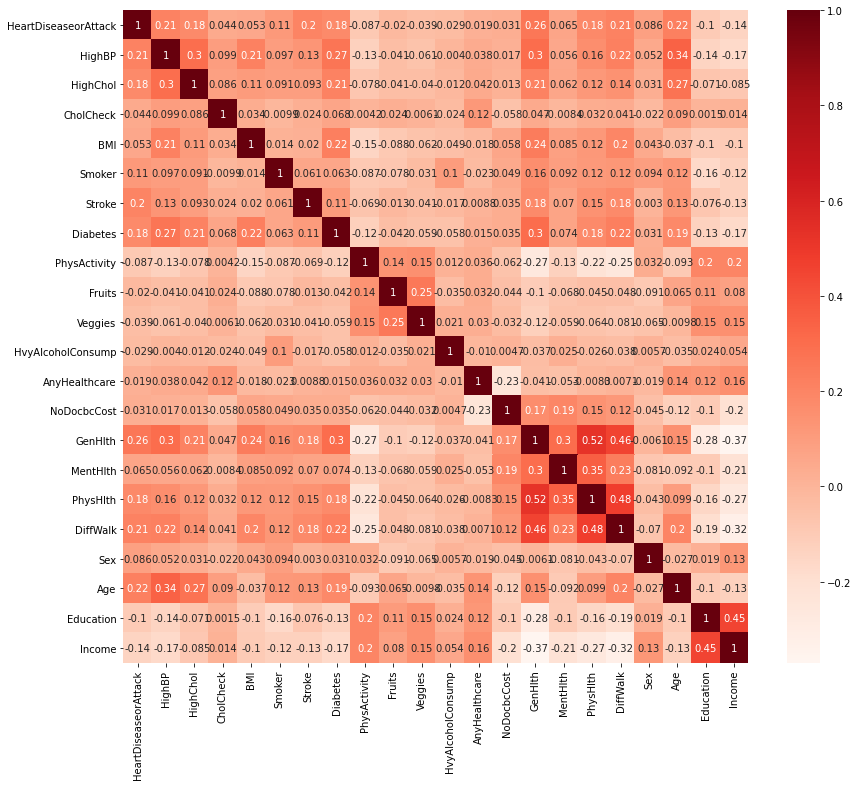

In [37]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)

# What are the most features effects in heart diseases?

*From figure above: the top 10 most revalent features to the target are:*
    
    1:CholCheck
    2:Age
    3:DiffWalk
    4:HighBP
    5:Stroke
    6:HighChol
    7:Diabetes
    8:PhysHlth
    9:Smoker
    10:sex
    

# Which gender is likely to have a high chance of heart disease?

In [38]:
#for that I have to convert both sex and the HeartDiseaseorAttack to categorical data
df['gender'] = df['Sex'].replace([0,1],['male','female'])
df['HeartDiseaseorAttackcat'] = df['HeartDiseaseorAttack'].replace([0,1],['No','Yes'])
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,gender,HeartDiseaseorAttackcat
0,0,1,1,1,40,1,0,0,0,0,...,5,18,15,1,0,9,4,3,male,No
1,0,0,0,0,25,1,0,0,1,0,...,3,0,0,0,0,7,6,1,male,No
2,0,1,1,1,28,0,0,0,0,1,...,5,30,30,1,0,9,4,8,male,No
3,0,1,0,1,27,0,0,0,1,1,...,2,0,0,0,0,11,3,6,male,No
4,0,1,1,1,24,0,0,0,1,1,...,2,3,0,0,0,11,5,4,male,No


<AxesSubplot:xlabel='gender'>

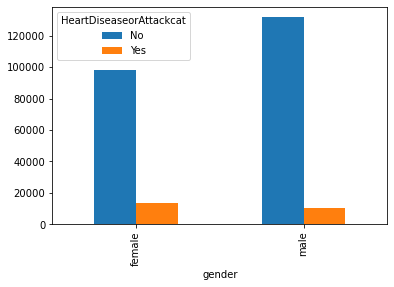

In [40]:
CrosstabResult=pd.crosstab(index=df['gender'],columns=df['HeartDiseaseorAttackcat'])
CrosstabResult.plot.bar()

**From figure above shows that the women are likely to have more chance with heart disease**

# Does diabetes have a relationship with heart diseases?

*As shown in heatmap diabetes has a correlation with HeartDiseaseorAttack by 0.18 which is considered as a week but for more explanation, I will visualize it*

<AxesSubplot:xlabel='diabetess'>

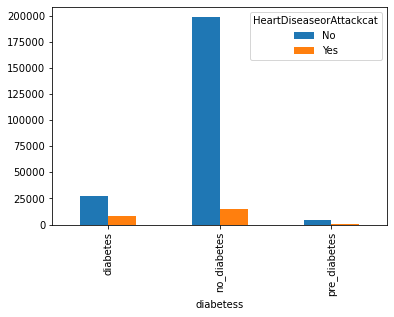

In [54]:
#creating a new column making diabetes as categorical type
df['diabetess'] = df['Diabetes'].replace([0,1,2],['no_diabetes','pre_diabetes','diabetes'])
CrosstabResultdi=pd.crosstab(index=df['diabetess'],columns=df['HeartDiseaseorAttackcat'])
CrosstabResultdi.plot.bar()

*Again As shown, diabetes has a weak relationship with heart diseases.*

**Feature selection and other things such as modeling is the next step inshallah**